# Tensorflow

## Dataset

In [24]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('../data-files/dataset.csv')
dataset


,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
0,Athletics,"3,500 metres Race Walk, Men",3.0,Bronze,76.0,184.0,Male,1908,29.0,22.448015,1
1,Swimming,"400 metres Freestyle, Men",2.0,Silver,65.0,170.0,Male,1908,17.0,22.491349,1
2,Swimming,"1,500 metres Freestyle, Men",3.0,Bronze,65.0,170.0,Male,1908,17.0,22.491349,1
3,Tennis,"Singles, Covered Courts, Men",3.0,Bronze,84.0,188.0,Male,1912,29.0,23.766410,1
4,Artistic Swimming,"Solo, Women",18.0,na,58.0,165.0,Female,1988,19.0,21.303949,0
...,...,...,...,...,...,...,...,...,...,...,...
80901,Bobsleigh,"Monobob, Women",12.0,na,74.0,180.0,Female,2022,28.0,22.839506,0
80902,Bobsleigh,"Monobob, Women",13.0,na,75.0,169.0,Female,2022,32.0,26.259585,0
80903,Bobsleigh,"Monobob, Women",14.0,na,73.0,171.0,Female,2022,29.0,24.964946,0
80904,Bobsleigh,"Monobob, Women",17.0,na,76.0,175.0,Female,2022,20.0,24.816327,0


## Encoding

In [25]:
# Convert categorical variables to numerical
sex_encoder = LabelEncoder()
sport_encoder = LabelEncoder()
event_encoder = LabelEncoder()
medal_encoder = LabelEncoder()

dataset['sex'] = sex_encoder.fit_transform(dataset['sex'])
dataset['sport'] = sport_encoder.fit_transform(dataset['sport'])
dataset['event'] = event_encoder.fit_transform(dataset['event'])
dataset['medal'] = medal_encoder.fit_transform(dataset['medal'])

dataset

,sport,event,pos,medal,weight,height,sex,year,age,bmi,podium
0,5,82,3.0,0,76.0,184.0,1,1908,29.0,22.448015,1
1,45,88,2.0,2,65.0,170.0,1,1908,17.0,22.491349,1
2,45,7,3.0,0,65.0,170.0,1,1908,17.0,22.491349,1
3,48,340,3.0,0,84.0,188.0,1,1912,29.0,23.766410,1
4,4,359,18.0,3,58.0,165.0,0,1988,19.0,21.303949,0
...,...,...,...,...,...,...,...,...,...,...,...
80901,8,284,12.0,3,74.0,180.0,0,2022,28.0,22.839506,0
80902,8,284,13.0,3,75.0,169.0,0,2022,32.0,26.259585,0
80903,8,284,14.0,3,73.0,171.0,0,2022,29.0,24.964946,0
80904,8,284,17.0,3,76.0,175.0,0,2022,20.0,24.816327,0


In [26]:
#splitting the data in a training and test set
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [27]:
train_features = train_dataset.copy()   #x_train
test_features = test_dataset.copy()     #x_test

train_labels = train_features.pop('sport')    #y_train
test_labels = test_features.pop('sport')      #y_test

train_features

,event,pos,medal,weight,height,sex,year,age,bmi,podium
10076,174,46.0,3,75.0,181.0,1,1984,26.0,22.893074,0
52935,5,17.0,3,93.0,190.0,1,2002,29.0,25.761773,0
2848,279,7.0,3,77.0,170.0,1,2016,23.0,26.643599,0
74635,299,9.0,3,64.0,160.0,1,1904,23.0,25.000000,0
17230,23,3.0,0,40.0,153.0,0,2012,29.0,17.087445,1
...,...,...,...,...,...,...,...,...,...,...
72774,362,6.0,3,59.0,170.0,0,1972,20.0,20.415225,0
66221,255,1.0,1,48.0,161.0,1,1980,21.0,18.517804,1
74044,85,30.0,3,64.0,173.0,0,2006,25.0,21.383942,0
49353,56,21.0,3,54.0,168.0,0,2008,23.0,19.132653,0


## Normalization

In [28]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features,np.float32))
normalizer.mean.numpy()

array([[1.8136008e+02, 2.0194052e+01, 2.7383854e+00, 6.9445328e+01,
        1.7438193e+02, 6.3572037e-01, 1.9931039e+03, 2.5788412e+01,
        2.2674488e+01, 1.3345693e-01]], dtype=float32)

## Linear regression

In [29]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(train_features.shape[1],)),
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [30]:
linear_model.predict(np.array(train_features,np.float32))

2023/2023 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step


array([[-1.0941795 ],
       [-0.17388546],
       [-0.1571573 ],
       ...,
       [ 0.12493025],
       [ 0.63840103],
       [ 1.5714686 ]], dtype=float32)

In [31]:
linear_model.layers[1].kernel

<KerasVariable shape=(10, 1), dtype=float32, path=sequential_2/dense_3/kernel>

In [32]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [33]:
history = linear_model.fit(
    np.array(train_features,np.float32), train_labels, #x_train, y_train
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

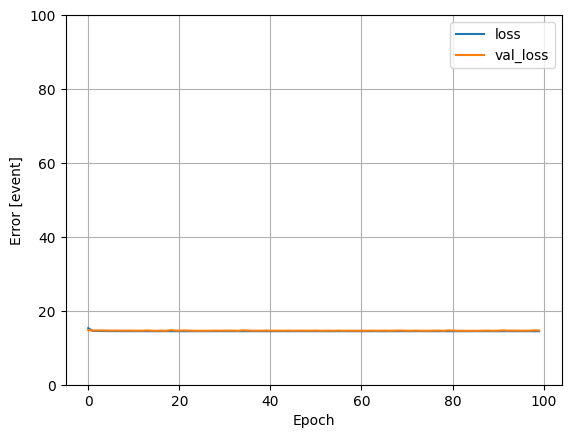

In [34]:
# import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [event]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [35]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    np.array(test_features,np.float32), test_labels, verbose=0)

506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step


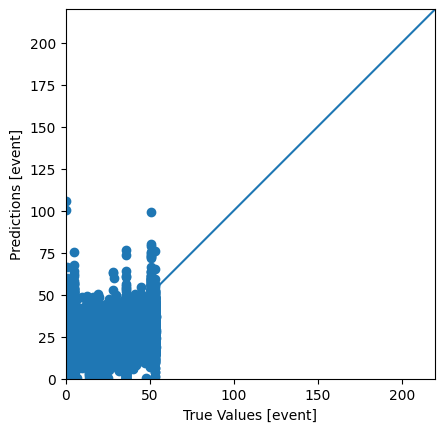

In [36]:
test_predictions = linear_model.predict(np.array(test_features,np.float32)).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [event]')
plt.ylabel('Predictions [event]')
lims = [0, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [37]:
test_preds= pd.DataFrame({"Original event": list(test_labels), "Predicted event": list(test_predictions.reshape(-1))})
test_preds["Percentage Difference"] = round(( abs(test_preds["Original event"] - test_preds[ "Predicted event"]) / test_preds["Original event"])*100 ,2)
print("Mean Percentage difference", test_preds["Percentage Difference"].mean())
test_preds

Mean Percentage difference inf


,Original event,Predicted event,Percentage Difference
0,45,23.242779,48.35
1,45,24.790302,44.91
2,45,32.806068,27.10
3,36,18.939680,47.39
4,45,44.395260,1.34
...,...,...,...
16176,41,27.821596,32.14
16177,41,32.926979,19.69
16178,41,23.166050,43.50
16179,42,38.782253,7.66


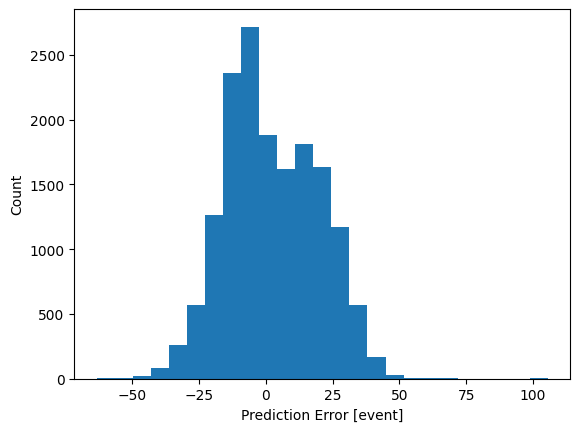

In [38]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [event]')
_ = plt.ylabel('Count')

## Save model file

In [39]:
linear_model.save('../data-files/linear_model.keras')
linear_model.save('../data-files/linear_model.h5')


## Deep Neural Network

In [40]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(train_features.shape[1],)),
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, name='output')
])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 10)             │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,950 (19.34 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 21 (88.00 B)

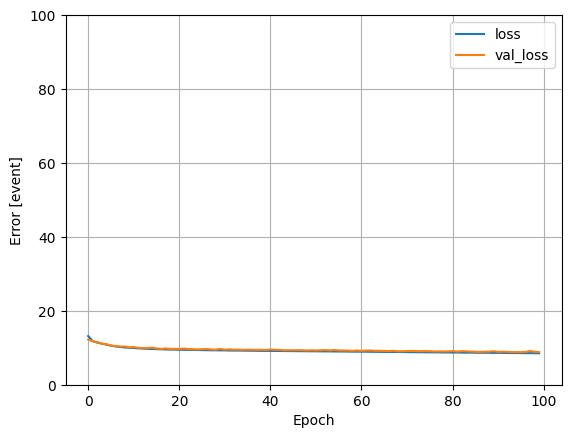

In [41]:
history = dnn_model.fit(
    np.array(train_features,np.float32),
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

In [42]:
test_results['dnn_model'] = dnn_model.evaluate(np.array(test_features,np.float32), test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [event]']).T

,Mean absolute error [event]
linear_model,14.483747
dnn_model,8.851992


506/506 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


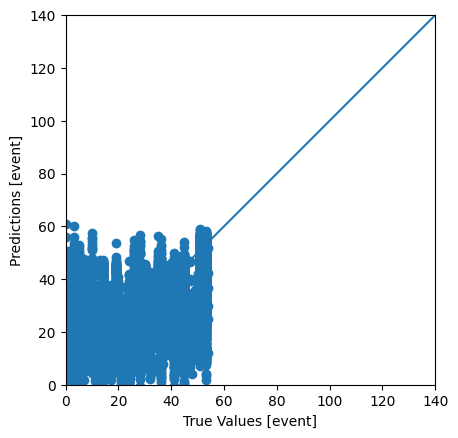

In [43]:
test_predictions = dnn_model.predict(np.array(test_features,np.float32)).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [event]')
plt.ylabel('Predictions [event]')
lims = [0, 140]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [44]:
test_preds= pd.DataFrame({"Original event": list(test_labels), "Predicted event": list(test_predictions.reshape(-1))})
test_preds["Percentage Difference"] = round(( abs(test_preds["Original event"] - test_preds[ "Predicted event"]) / test_preds["Original event"])*100 ,2)
print("Mean Percentage difference", test_preds["Percentage Difference"].mean())
test_preds

Mean Percentage difference inf


,Original event,Predicted event,Percentage Difference
0,45,17.799057,60.45
1,45,39.592155,12.02
2,45,30.787300,31.58
3,36,21.506622,40.26
4,45,45.453835,1.01
...,...,...,...
16176,41,28.945379,29.40
16177,41,29.271172,28.61
16178,41,26.032187,36.51
16179,42,36.912083,12.11


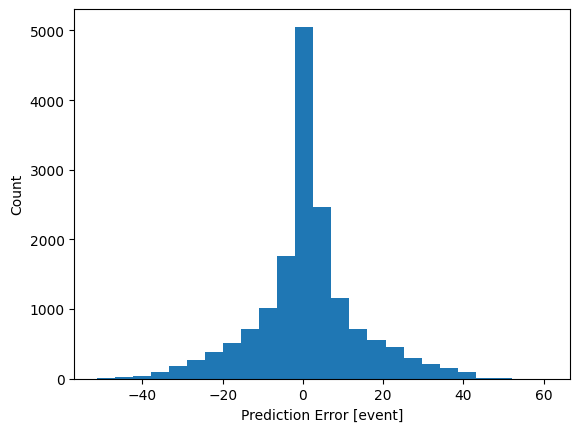

In [45]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [event]')
_ = plt.ylabel('Count')

In [46]:
dnn_model.save('../data-files/dnn_model.keras')

dnn_model.save('../data-files/dnn_model.h5') # The '.h5' extension indicates that the model should be saved to HDF5. Needed if you want to use your model in a web application

In [48]:
import onnx
import keras2onnx
import onnxruntime

net_onnx = keras2onnx.convert_keras(dnn_model)
onnx.save_model(net_onnx, '../data-files/dnn_model.onnx')

AttributeError: module 'tensorflow.python.keras' has no attribute 'applications'